In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [2]:
df = pd.read_csv("scalers.csv")[["time", "rateCorr"]]
df["time"] = pd.to_datetime(df["time"], unit = "s")
df = df.set_index("time")

In [3]:
def plot(x, y, c = "orangered", a = 0.8, l = 0.5, lab = "", size = (15, 5), formater = '%Y-%m-%d'):
    #ax = plt.figure(figsize = (15, 5))

    plt.plot(x, y, color = c, alpha = a, linewidth = l, label = lab)
    plt.xticks(ax.xaxis.set_major_formatter(mdates.DateFormatter(formater)))
    
def scatter(x, y, c = "k", m = "x", msize= 1 , lab = "", size = (15, 5), formater = '%Y-%m-%d'):
    plt.plot(x, y, c, marker = m,markeredgewidth = msize, linestyle = "", label = lab)
    plt.xticks(ax.xaxis.set_major_formatter(mdates.DateFormatter(formater)))

    
def formato(x = None, y= "counts [$m^2 / s$]"):
    plt.xlabel(x)
    plt.ylabel(y, size = 13)
    plt.grid(linestyle=':', linewidth=1.5)



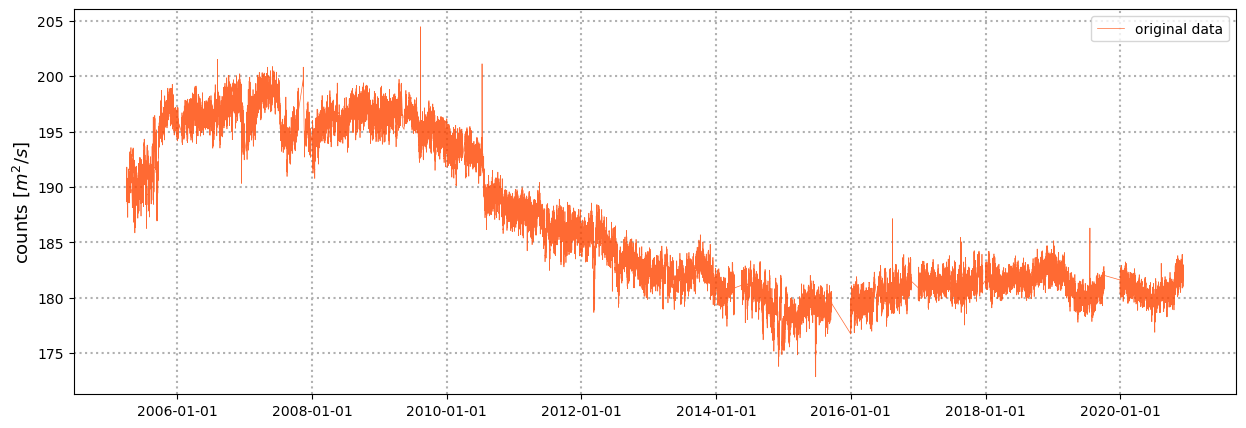

In [4]:
fig, ax = plt.subplots(figsize = (15,5))

plot(df.index, df["rateCorr"], lab = "original data")
formato()
plt.legend()

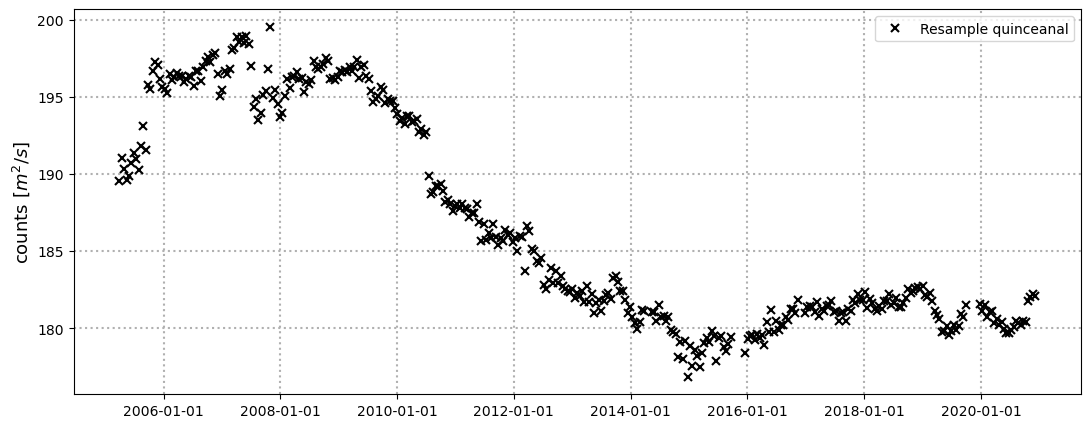

In [5]:

#Resample en quinceanal
fig, ax = plt.subplots(figsize = (13,5))

dfm = df.dropna().resample("15D").mean() #Ventana Horas

scatter(dfm.index, dfm["rateCorr"], lab = "Resample quinceanal", msize = 1.5) 
formato()
plt.legend()

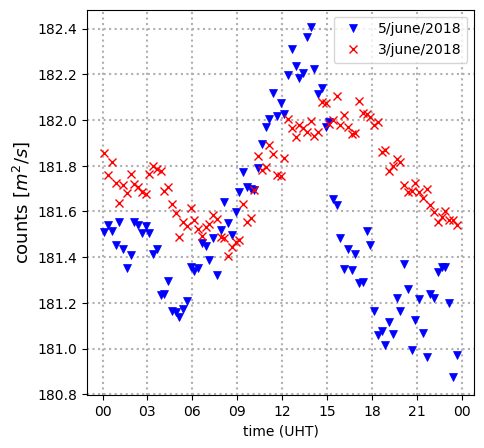

In [6]:
fig, ax = plt.subplots(figsize = (5,5))

scatter(df.loc["2/june/2018"].index, df.loc["5/june/2018"]["rateCorr"], size = (5,5), msize = 0.5,formater = "%H", m = "v", c = "b", lab = "5/june/2018")
scatter(df.loc["2/june/2018"].index, df.loc["3/june/2018"].reset_index()["rateCorr"], size = (5,5), msize = 1,formater = "%H", m = "x", c = "r", lab = "3/june/2018")


#plot(df.loc["2/june/2018"].index, june_2018.reset_index()["rateCorr"], l = 2, size = (5,5),formater = "%H", c = "k", lab = "june/2018 average")

formato("time (UHT)")
plt.legend()



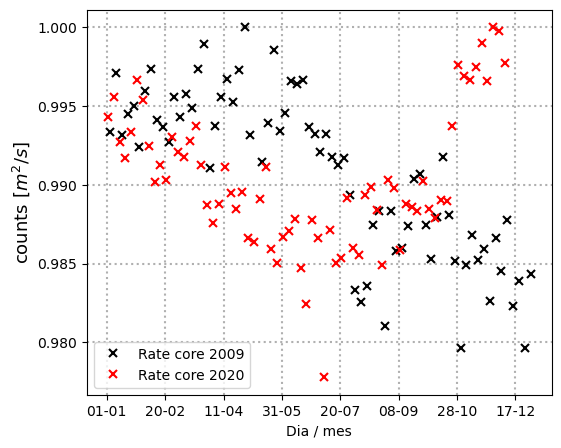

In [7]:
#Grafica por año

years = ["2009", "2020"]
col = ["k", "r"]
fig, ax = plt.subplots(figsize = (6,5))

dfm = df.dropna().resample("5D").mean() #Ventana Horas

for i, year in enumerate(years):
    dfm_ni = dfm.loc[year]
    scatter(dfm_ni.index.dayofyear, dfm_ni["rateCorr"] / max(dfm_ni["rateCorr"]), lab = "Rate core {}".format(year), 
            msize = 1.5, c = col[i], formater = "%d-%m") 
formato(x = "Dia / mes")
plt.legend()

In [8]:
#Verano (21 de diciembre a 20 de marzo).
#Otoño (21 de marzo a 20 de junio).
#Invierno (21 de junio a 20 de septiembre).
#Primavera (21 de septiembre a 20 de diciembre).

def interval(season, year): #Season interval
    seasons = {"verano": [f"{year}/01/01", f"{year}/03/20"],
              "otoño":   [f"{year}/03/21", f"{year}/06/20"],
              "invierno": [f"{year}/06/21", f"{year}/08/20"],
              "primavera": [f"{year}/08/21", f"{year}/12/20"]}
    
    return seasons[season]
    


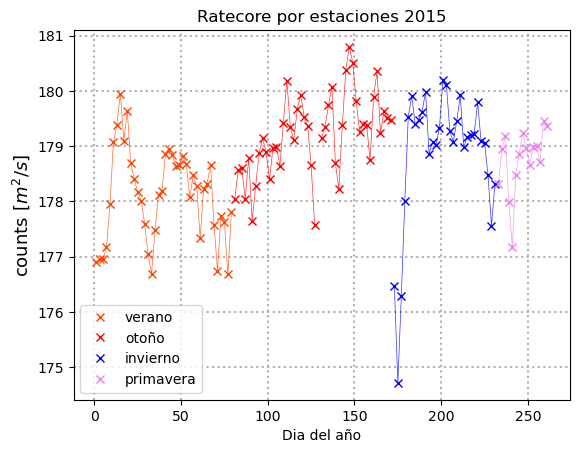

In [9]:


dfm = df.dropna().resample("2D").mean() #Ventana Horas
seasons = ["verano", "otoño", "invierno", "primavera"]
year = "2015"
col = ["orangered", "red", "blue", "violet"]

for i, season in enumerate(seasons):
    dfm_ni = dfm[interval(season, year)[0]:interval(season, year)[1]]
    
    scatter(dfm_ni.index.dayofyear, dfm_ni["rateCorr"], lab = "{}".format(season), 
         c = col[i], formater = "%d-%m") 
    plot(dfm_ni.index.dayofyear, dfm_ni["rateCorr"], 
         c = col[i], formater = "%d-%m")
    
plt.title("Ratecore por estaciones {}".format(year))


formato(x = "Dia del año")
plt.legend()

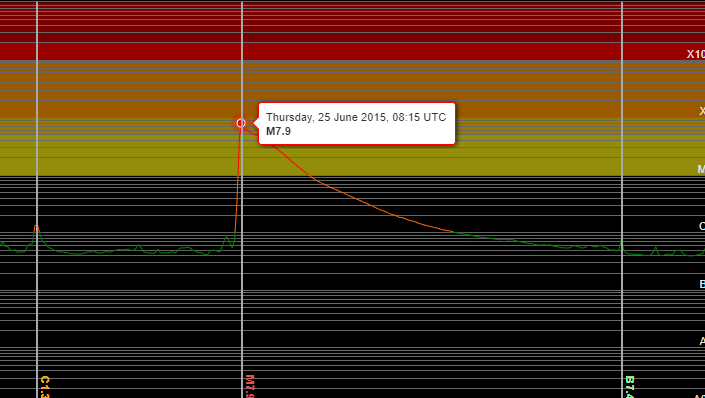

<AxesSubplot:title={'center':'Conteo de particulas Junio 2015'}, xlabel='time'>

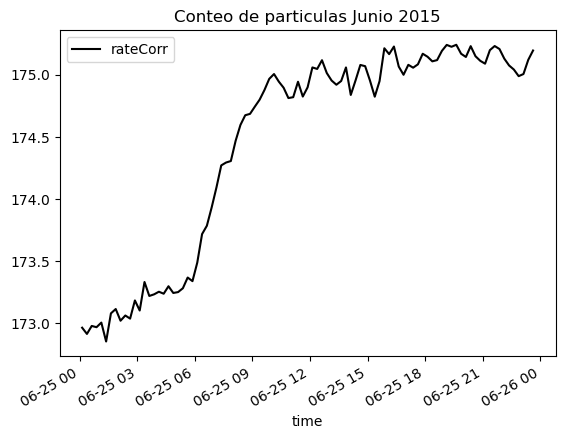

In [10]:
df.loc["25/june/2015"].plot(c = "k", title = "Conteo de particulas Junio 2015") 

### Data set de actividad solar $\rightarrow$ número de manchas solares

In [26]:
sf = pd.read_csv("sunspot.csv")[["Date", "Monthly Mean Total Sunspot Number"]]
sf["Date"] = pd.to_datetime(sf["Date"])
sf = sf.set_index("Date")
sf = sf["2005-03":] #Recorte a partir de donde empiezan los datos del conteo de particulas
dfM = df.dropna().resample("M").mean() #Resample mensual del conteo de particulas

In [44]:
jf = dfM.join(sf, how='inner') #convinación de los dos dataframes
jf.set_axis(["ratecorr", "sunspot"], axis = 1, inplace = True)
jf.dropna(inplace = True)

In [64]:
import scipy.stats as sp


In [50]:
pearson = sp.pearsonr(jf["ratecorr"], jf["sunspot"])
pearson


PearsonRResult(statistic=-0.3965082936794211, pvalue=2.5191540078858566e-08)

Se calculó el coeficiente de correlación de Pearson entre estas dos variables, obteniendo un valor de -0.3965, lo que indica una relación lineal negativa moderada. Esto significa que a medida que el número de manchas solares aumenta, el conteo de astropartículas disminuye, y viceversa. Además, se obtuvo un valor p muy pequeño (2.519e-08), por lo que se puede decir con seguridad que la correlación es estadísticamente significativa y no debida al azar.

Estos resultados sugieren que existe una influencia del ciclo solar sobre el flujo de astropartículas que llegan a la Tierra, posiblemente debido a los cambios en el campo magnético solar y en el viento solar. 

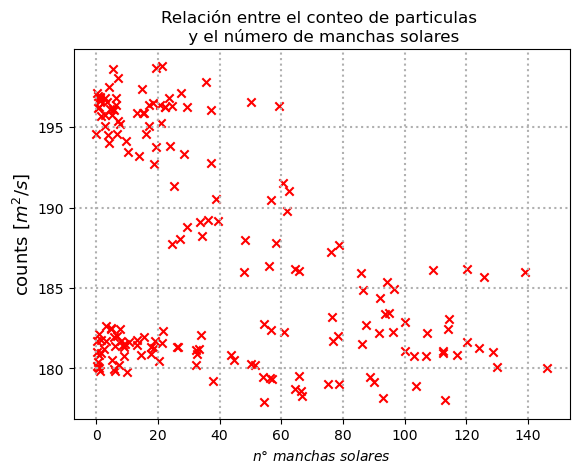

In [61]:
plt.title("Relación entre el conteo de particulas \n y el número de manchas solares")
plt.scatter(jf["sunspot"], jf["ratecorr"], marker = "x", c = "r")

formato(x = "$n$° $manchas$ $solares$")

#observación: Se evidencia una relación inversa, los datos tienen a seguir una linea que se observa en la diagonal, sin embargo
#otra linea se aprecia un poco más abajo

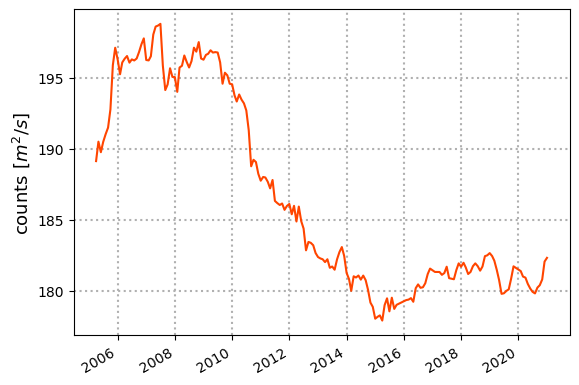

In [82]:
jf["ratecorr"].plot(color = "orangered")
formato()

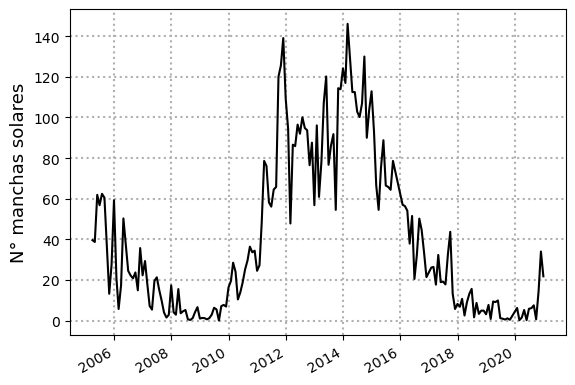

In [84]:
jf["sunspot"].plot(color = "k")
formato(y = "N° manchas solares")